In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [69]:
@njit()
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@njit()
def myFun(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])


Text(0, 0.5, 'y')

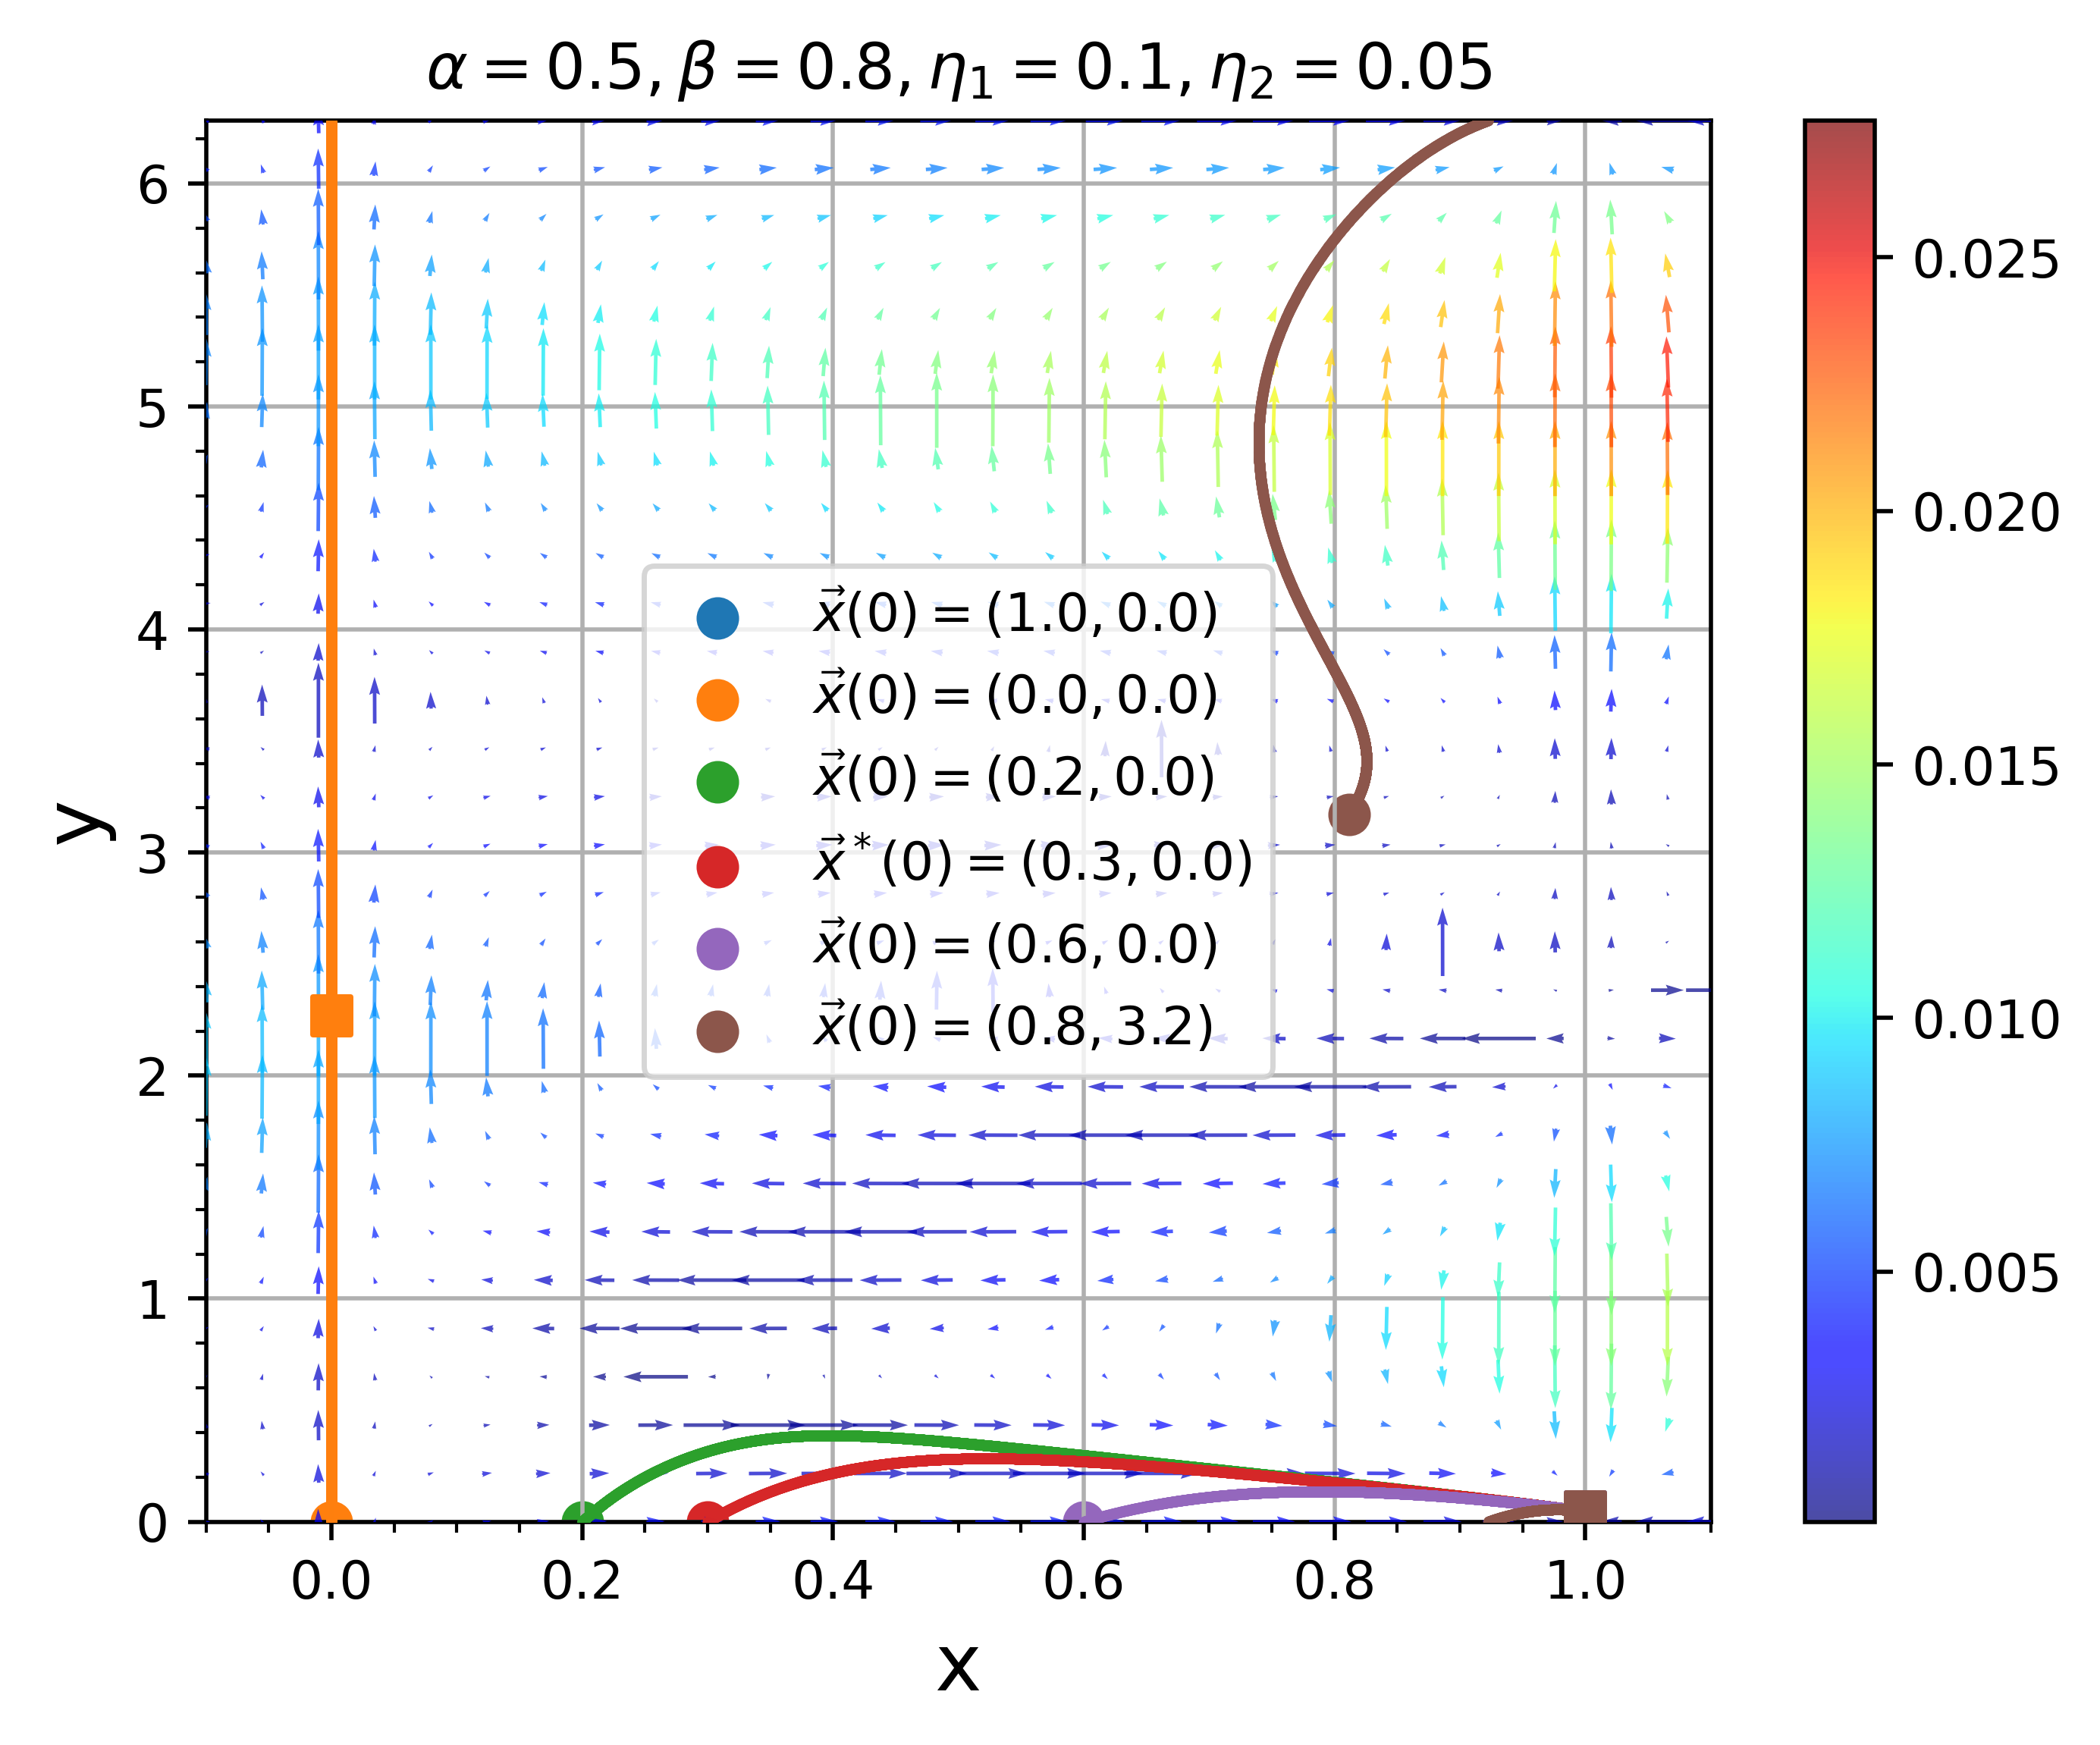

In [96]:
# beta = 0.7
# alpha = 1.2
# eta1 = 0.1
# eta2 = 0.05

alpha = 0.5
beta = 0.8
eta1 = 0.1
eta2 = 0.05

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
y = np.linspace(0,0,1)
x = np.linspace(0,2*np.pi,5)
X,Y = np.meshgrid(x,y)
fx = 0.5
fy = 0.5
# u0s = [[1-1e-3,0],[0 + 1e-3,1],[fx,fy]]
u0s = [[1,0],[0,0],[0.2,0],[0.3,0],[0.6, 0],[0.9114966199929684-0.1,3.072208206306462+0.1]]
# u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
plt.figure(dpi=500)
for i,u0 in enumerate(u0s):

	u = RK4(myFun,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	else:	
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	plt.scatter(u[-1,0],u[-1,1]%(np.pi*2),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(u[:,0],u[:,1]%(np.pi*2),s=1,alpha=0.8,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

plt.legend()
x = np.linspace(-0.1,1.2,30)
y = np.linspace(0,2*np.pi,30)
X,Y = np.meshgrid(x,y)

U,V = myFun2([X,Y],0,args)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);

# V = 0*V
xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=20,pivot='mid',cmap='jet',zorder=3,alpha=0.7)
plt.colorbar()
plt.xlim(-0.1,1.1)
plt.ylim(0,2*np.pi)
# plt.legend()
ax =plt.gca()
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

